In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [17]:
df = pd.read_csv("Fake.csv")

In [18]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [19]:
#add a column
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

Setting filter options and applying filtering

In [20]:
start_date = '2017-01-01'
end_date = '2017-12-31'
selected_subject = 'News'

In [21]:
filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
if selected_subject:
    filtered_df = filtered_df[filtered_df['subject'] == selected_subject]

In [22]:
print(f"Filtered articles: {len(filtered_df)}")


Filtered articles: 3209


In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

<Figure size 1600x1000 with 0 Axes>

<Figure size 1600x1000 with 0 Axes>

Distribution Of Articles.

/tmp/ipython-input-24-2041782109.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='subject', order=df['subject'].value_counts().index, palette="Set2")


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'News'),
  Text(1, 0, 'politics'),
  Text(2, 0, 'left-news'),
  Text(3, 0, 'Government News'),
  Text(4, 0, 'US_News'),
  Text(5, 0, 'Middle-east')])

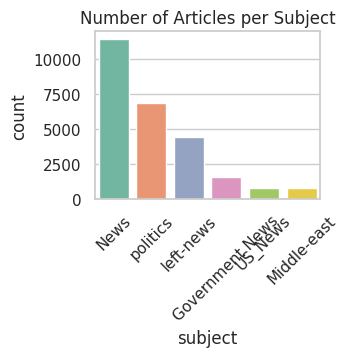

In [24]:
plt.subplot(2, 2, 1)
sns.countplot(data=df, x='subject', order=df['subject'].value_counts().index, palette="Set2")
plt.title("Number of Articles per Subject")
plt.xticks(rotation=45)

Monthly Count Of Articles.

Text(0, 0.5, 'Number of Articles')

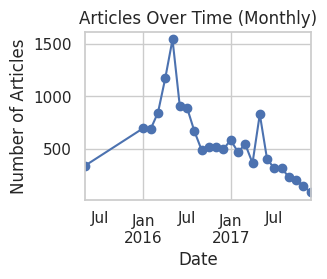

In [25]:
plt.subplot(2, 2, 2)
monthly_counts = df['date'].dt.to_period("M").value_counts().sort_index()
monthly_counts.plot(kind='line', marker='o')
plt.title("Articles Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")

Word Cloud of Article Titles

Text(0.5, 1.0, 'Word Cloud of Article Titles')

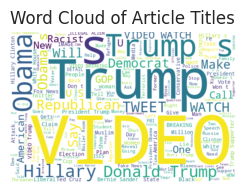

In [26]:
plt.subplot(2, 2, 3)
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(' '.join(df['title'].dropna()))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Article Titles")

Text length distribution

Text(0.5, 0, 'Word Count')

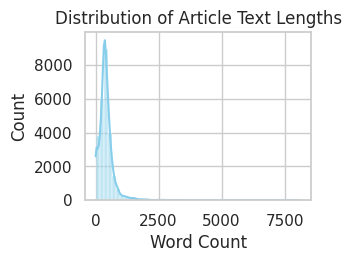

In [27]:
plt.subplot(2, 2, 4)
sns.histplot(df['text_length'], bins=50, kde=True, color="skyblue")
plt.title("Distribution of Article Text Lengths")
plt.xlabel("Word Count")

In [28]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>